In [1]:
## Comparison of Logistic Regression versus XGBoost of ictal cases w.r.t. each of the other classes
## Original data file is stripped to create 1 vs. 2, 1 vs. 3, 1 vs. 4 and 1 vs. 5 pieces in R
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [7]:
eeg_12 = pd.read_csv("data_12.csv")

In [8]:
Y = list(eeg_12.pop('y'))

In [9]:
X = eeg_12.values

In [11]:
X.shape

(4600, 178)

In [14]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=0)

In [15]:
# Logistic Regression to train
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# Prediction on test data
Y_pred = logreg.predict(X_test)

In [18]:
from sklearn import metrics
print("Accuracy-Cross-Validation")
print(metrics.accuracy_score(Y_test, Y_pred))

Accuracy-Cross-Validation
0.640316205534


In [20]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test, Y_pred, labels = [0, 1])

In [21]:
print(cm)

[[627 117]
 [429 345]]


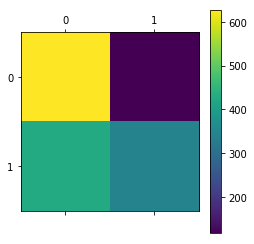

In [22]:
plt.matshow(cm)
plt.colorbar()
plt.show()

In [23]:
# first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
# first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[ 0.56728712,  0.43271288],
       [ 0.64458264,  0.35541736],
       [ 0.80670685,  0.19329315],
       [ 0.5423237 ,  0.4576763 ],
       [ 0.46383227,  0.53616773],
       [ 0.54107125,  0.45892875],
       [ 0.52991683,  0.47008317],
       [ 0.5675452 ,  0.4324548 ],
       [ 0.55180558,  0.44819442],
       [ 0.57858798,  0.42141202]])

In [25]:
# first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([ 0.43271288,  0.35541736,  0.19329315,  0.4576763 ,  0.53616773,
        0.45892875,  0.47008317,  0.4324548 ,  0.44819442,  0.42141202])

In [31]:
# storing the predicted probabilities for class 1
Y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

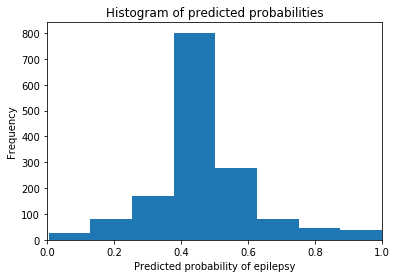

In [32]:
# histogram of predicted probabilities
plt.hist(Y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy')
plt.ylabel('Frequency')

In [33]:
# predict seizure if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
Y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [34]:
# first 10 predicted seizure cases
Y_pred_class[0:10]

array([ 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [35]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(Y_test, Y_pred_class))

[[  9 735]
 [137 637]]


In [36]:
# sensitivity has increased 
print(637 / float(137 + 637))

0.8229974160206718


In [37]:
# specificity has decreased 
print(9 / float(9 + 735))

0.012096774193548387


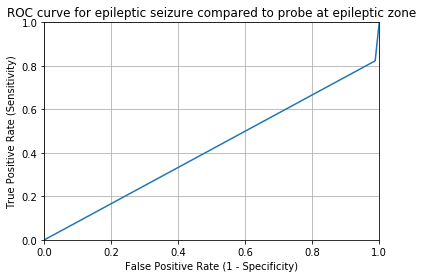

In [61]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_class)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for epileptic seizure compared to probe at epileptic zone')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [39]:
# function to accept a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [40]:
evaluate_threshold(0.5)

Sensitivity: 0.445736434109
Specificity: 0.842741935484


In [41]:
# Cross-validated AUC
cross_val_score(logreg, X, Y, cv=10, scoring='roc_auc').mean()

0.52973724007561429

In [ ]:
# ROC for seizure compared to probe on healthy zone of brain

In [43]:
eeg_13 = pd.read_csv("data_13.csv")

In [45]:
Y1 = list(eeg_13.pop('y'))

In [46]:
X1 = eeg_13.values

In [47]:
test_size = 0.33
X1_train, X1_test, Y1_train, Y1_test = cross_validation.train_test_split(X1, Y1, test_size=test_size, random_state=0)

In [48]:
logreg.fit(X1_train, Y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
# Prediction on class 1 vs. class 3 test data
Y1_pred = logreg.predict(X1_test)

In [50]:
print("Accuracy-Cross-Validation")
print(metrics.accuracy_score(Y1_test, Y1_pred))

Accuracy-Cross-Validation
0.613965744401


In [51]:
cm1 = confusion_matrix(Y1_test, Y1_pred, labels = [0, 1])

In [52]:
print(cm1)

[[600 144]
 [442 332]]


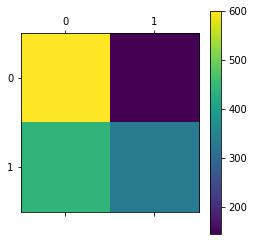

In [53]:
plt.matshow(cm1)
plt.colorbar()
plt.show()

In [54]:
Y1_pred_prob = logreg.predict_proba(X1_test)[:, 1]

Text(0,0.5,'Frequency')

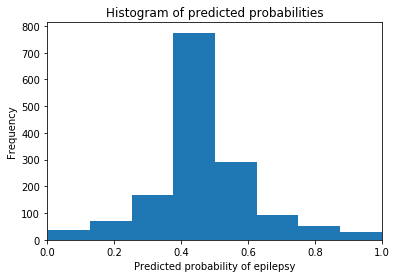

In [55]:
plt.hist(Y1_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of epilepsy')
plt.ylabel('Frequency')

In [56]:
# prediction for seizure
Y1_pred_class = binarize([Y1_pred_prob], 0.3)[0]

In [57]:
print(metrics.confusion_matrix(Y1_test, Y1_pred_class))

[[ 11 733]
 [140 634]]


In [58]:
print("sensitivity") 
print(634 / float(140 + 634))
print("specificity") 
print(11 / float(11 + 733))

sensitivity
0.8191214470284238
specificity
0.01478494623655914


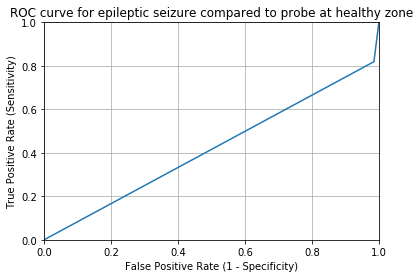

In [62]:
# ROC Plot class 1 vs. class 3
fpr, tpr, thresholds = metrics.roc_curve(Y1_test, Y1_pred_class)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for epileptic seizure compared to probe at healthy zone')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [60]:
# Cross-validated AUC
cross_val_score(logreg, X1, Y1, cv=10, scoring='roc_auc').mean()

0.52089792060491491